<a href="https://colab.research.google.com/github/regain001/Interview-Preparation/blob/master/arrays_%26_hashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

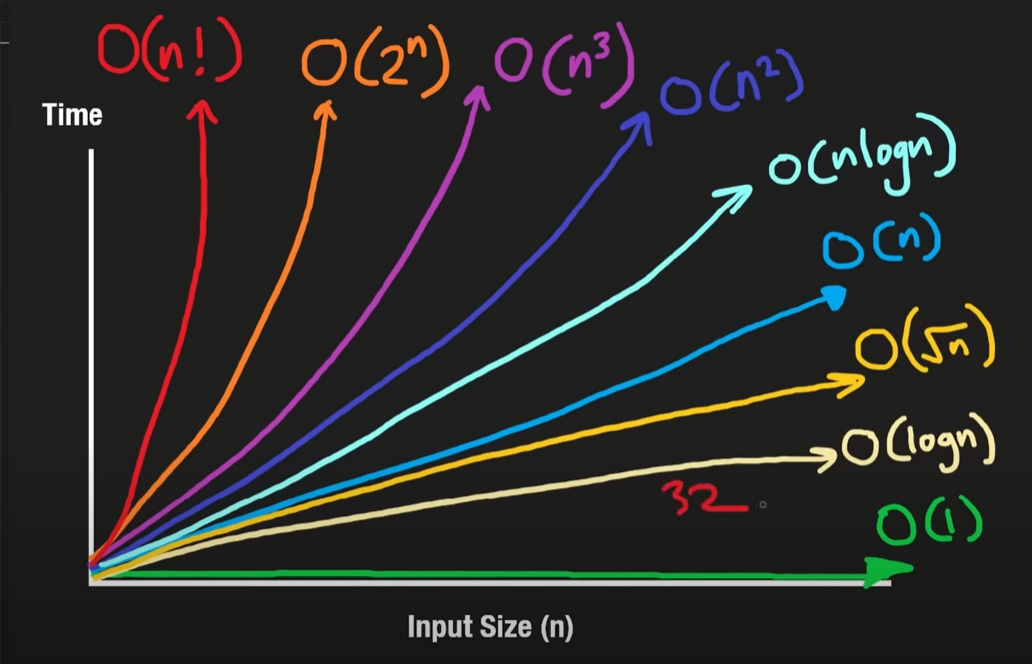

---

**242. Valid Anagram**

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 
```
Example 1:

Input: s = "anagram", t = "nagaram"
Output: true
Example 2:

Input: s = "rat", t = "car"
Output: false
 

Constraints:

1 <= s.length, t.length <= 5 * 104
s and t consist of lowercase English letters.
```

In [ ]:
def isAnagram(source, target):
    char_map = {}
    
    if len(source) != len(target): return False
    if (len(source) >= 1 and len(target) <= 50000) is not True: return False

    for i in source:
        if i not in char_map: char_map[i] = 1
        else: char_map[i] = char_map[i] + 1

    for j in target:
        if j not in char_map: return False
        if char_map[j] == 0 : return False

        char_map[j] = char_map[j] - 1

    return True


def main():
    print('isAnagram :', isAnagram("anagram", "nagaram"))
    print('-----------------')
    print('isAnagram :', isAnagram("rat", "cat"))
    print('-----------------')
    print('isAnagram :', isAnagram("a", "a"))



if __name__ == "__main__":
    main()

isAnagram : True
-----------------
isAnagram : False
-----------------
isAnagram : True


---

**1. Two Sum**

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have **exactly one solution**, and you may not use the same element twice.

You can return the answer in any order.
```
Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]
Example 3:

Input: nums = [3,3], target = 6
Output: [0,1]
 

Constraints:

2 <= nums.length <= 104
-109 <= nums[i] <= 109
-109 <= target <= 109
Only one valid answer exists.
 

Follow-up: Can you come up with an algorithm that is less than O(n2) time complexity?
```



In [ ]:
def twoSum(nums, target):
    if (2 <= len(nums) <= 10000) is False: return False
    for n in nums:
        if (-1000000000 <= n <= 1000000000) is False: return False

    for i in range(len(nums)):
        for j in range(len(nums)):
            ## condition: i != j, because we can not use the same element twice.
            if i != j and (nums[i] + nums[j]) == target:
                ret_arr = [i, j]
                return ret_arr

    return []

def twoSumOptimalSolution(nums, target):
    if (2 <= len(nums) <= 10000) is False: return False
    for n in nums:
        if (-1000000000 <= n <= 1000000000) is False: return False

    hash_map = {}
    for i, num in enumerate(nums):
        if target - num in hash_map:
            return [i, hash_map[target - num]]
        hash_map[num] = i
    return []


def main():
    print('twoSum :', twoSum([2,7,11,15], 9))
    print('-----------------')
    print('twoSum :', twoSum([3,3], 6))
    print('-----------------')
    print('twoSum :', twoSum([3,2,4], 6))
    print('-----------------')
    print('-----------------')
    print('twoSumOptimalSolution :', twoSumOptimalSolution([2,7,11,15], 9))
    print('-----------------')
    print('twoSumOptimalSolution :', twoSumOptimalSolution([3,3], 6))
    print('-----------------')
    print('twoSumOptimalSolution :', twoSumOptimalSolution([3,2,4], 6))


if __name__ == "__main__":
    main()

twoSum : [0, 1]
-----------------
twoSum : [0, 1]
-----------------
twoSum : [1, 2]
-----------------
-----------------
twoSumOptimalSolution : [1, 0]
-----------------
twoSumOptimalSolution : [1, 0]
-----------------
twoSumOptimalSolution : [2, 1]


---

**49. Group Anagrams**



 
```

```

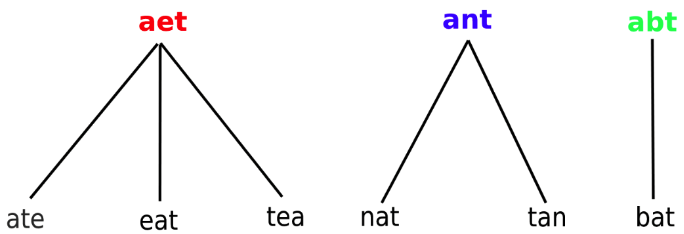

In [ ]:
from builtins import enumerate

## Time complexity: O(m*nlogn))
## Space complexity: O(n)

def groupAnagrams(strs):
    hash_map = {}
    for i, str in enumerate(strs):
        sorted_str = ''.join(sorted(str))
        if sorted_str not in hash_map:
            hash_map[sorted_str] = []
        hash_map[sorted_str].append(str)

    return list(hash_map.values())


def main():
    print('groupAnagrams :', groupAnagrams(["eat","tea","tan","ate","nat","bat"]))


if __name__ == "__main__":
    main()

groupAnagrams : [['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


---
**347. Top K Frequent Elements**

Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

 
```
Example 1:

Input: nums = [1,1,1,2,2,3], k = 2
Output: [1,2]
Example 2:

Input: nums = [1], k = 1
Output: [1]
 

Constraints:

1 <= nums.length <= 105
-104 <= nums[i] <= 104
k is in the range [1, the number of unique elements in the array].
It is guaranteed that the answer is unique.
 

Follow up: Your algorithm's time complexity must be better than O(n log n), where n is the array's size.
```

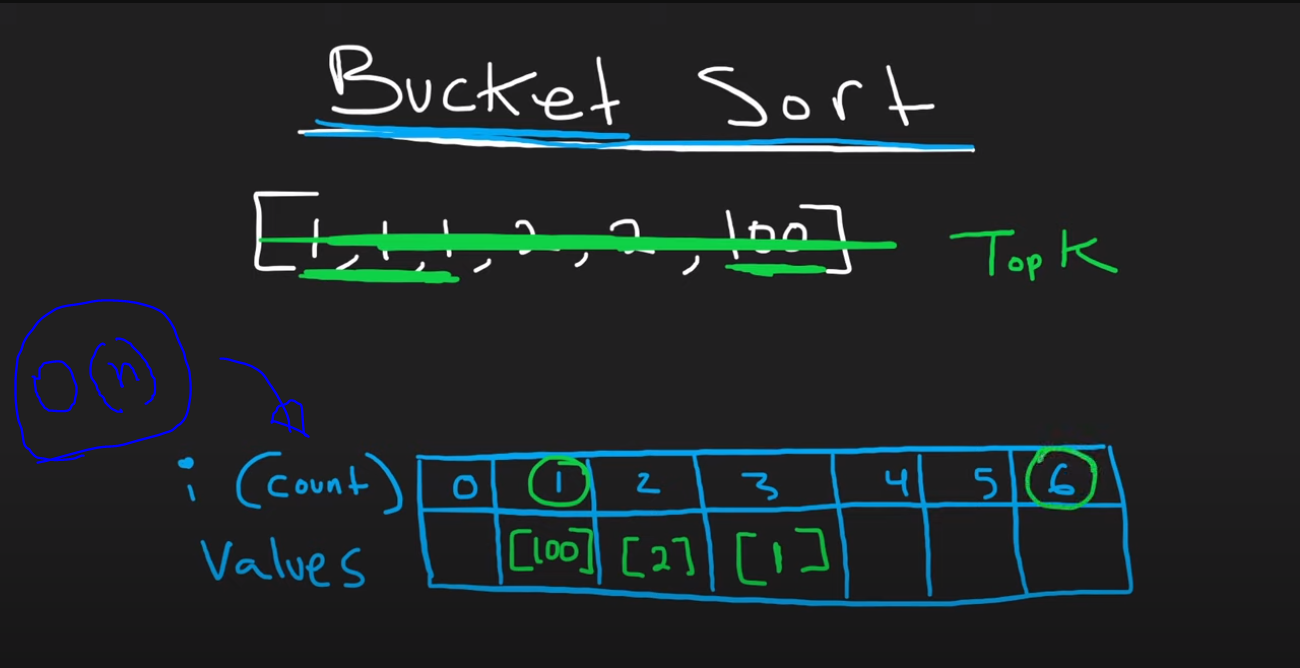

In [ ]:
from builtins import enumerate
from collections import Counter
from math import inf


## Time complexity : O(k log n)
def topKFrequentByHeapDS(nums, k):
    ## Count the occurrences of each number in a array
    c = Counter(nums) ## O(n)
    ret_arr = []
    ## Print the most common k integer and their counts
    for num, count in c.most_common(k): ## O(k log n), due to k and use of a heap data structure - O(log n)
            ret_arr.append(num)
    return ret_arr


## Study link: https://www.youtube.com/watch?v=YPTqKIgVk-k
## Space & Time complexity : O(n)
def topKFrequentByBucketSort(nums, k):
    count = {}
    freq = [[] for i in range(len(nums) + 1)]

    for n in nums:
        count[n] = 1 + count.get(n, 0) # if n is not in the dict, return 0

    for n, c in count.items():
        freq[c].append(n)

    res = []
    for i in range(len(freq)-1, 0, -1):
        for n in freq[i]:
            res.append(n)
        if len(res) == k : return res

def main():
    print('topKFrequent :', topKFrequentByHeapDS([1,1,1,2,2,3], 2))
    print('-----------------')
    print('topKFrequentByBucketSort :', topKFrequentByBucketSort([1,1,1,2,2,3], 2))


if __name__ == "__main__":
    main()

topKFrequent : [1, 2]
-----------------
topKFrequentByBucketSort : [1, 2]




---
**238. Product of Array Except Self**

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in **O(n)** time and without using the division operation.

 
```
Example 1:

Input: nums = [1,2,3,4]
Output: [24,12,8,6]
Example 2:

Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]
 

Constraints:

2 <= nums.length <= 105
-30 <= nums[i] <= 30
The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.
 

Follow up: Can you solve the problem in O(1) extra space complexity? (The output array does not count as extra space for space complexity analysis.)
```

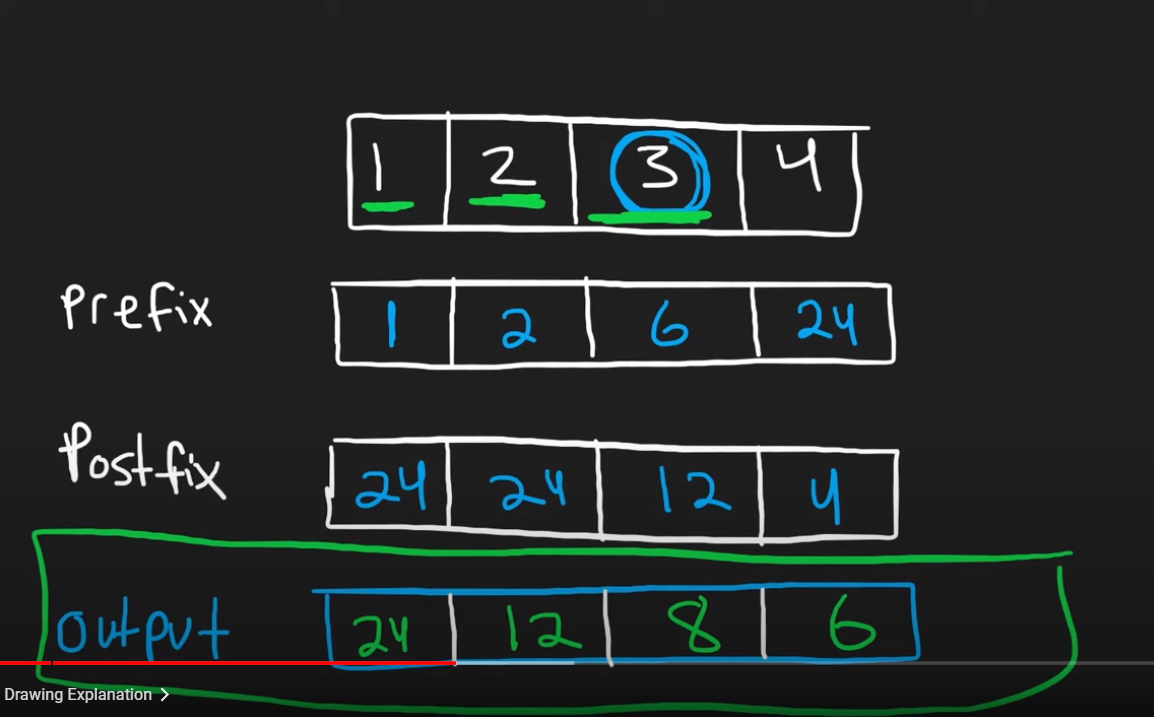

In [ ]:
## Time complexity : O(n)
## Space complexity : O(n)
def productExceptSelf_1(nums):
    prefix = 1
    prefix_product = [1]*len(nums)
    for i in range(len(nums)):
        prefix *= nums[i-1] if i != 0 else 1
        prefix_product[i] = prefix
    print('prefix_product : ', prefix_product)

    postfix = 1
    postfix_product = [1]*len(nums)
    for i in range(len(nums) - 1, -1, -1):
        postfix *= nums[i+1] if i != len(nums) - 1 else 1
        postfix_product[i] = postfix
    print('postfix_product : ', postfix_product)

    res = [1]*len(nums)
    for i in range(len(res)):
        res[i] = prefix_product[i] * postfix_product[i]
    return res


## Time complexity : O(n)
## Space complexity : O(1)
def productExceptSelf_2(nums):
    res = [1]*len(nums)

    prefix = 1
    for i in range(len(nums)):
        prefix *= nums[i-1] if i != 0 else 1
        res[i] = prefix
    print('prefix : ', res)

    postfix = 1
    for i in range(len(nums) -1, -1, -1):
        postfix *= nums[i+1] if i != len(nums) - 1 else 1
        res[i] = res[i] * postfix
    print('postfix : ', res)
    return res

## Time complexity : O(n)
## Space complexity : O(1)
##Study link: https://www.youtube.com/watch?v=bNvIQI2wAjk
def productExceptSelfOptimal(nums):
        res = [1] * (len(nums))

        prefix = 1
        for i in range(len(nums)):
            res[i] = prefix
            prefix *= nums[i]
        postfix = 1
        for i in range(len(nums) - 1, -1, -1):
            res[i] *= postfix
            postfix *= nums[i]
        return res

def main():
    print('productExceptSelf_1 :', productExceptSelf_1([1,2,3,4]))
    print('-----------------')
    print('productExceptSelf_2 :', productExceptSelf_2([1,2,3,4]))
    print('-----------------')
    print('productExceptSelfOptimal :', productExceptSelfOptimal([1,2,3,4]))


if __name__ == "__main__":
    main()

prefix_product :  [1, 1, 2, 6]
postfix_product :  [24, 12, 4, 1]
productExceptSelf_1 : [24, 12, 8, 6]
-----------------
prefix :  [1, 1, 2, 6]
postfix :  [24, 12, 8, 6]
productExceptSelf_2 : [24, 12, 8, 6]
-----------------
productExceptSelfOptimal : [24, 12, 8, 6]


**659. Encode and Decode Strings (LintCode)**


---



Design an algorithm to encode a list of strings to a string. The encoded string is then sent over the network and is decoded back to the original list of strings.

Please implement encode and decode

```
Example 1
Input: ["lint","code","love","you"]
Output: ["lint","code","love","you"]
Explanation:
One possible encode method is: "lint:;code:;love:;you"

Example 2
Input: ["we", "say", ":", "yes"]
Output: ["we", "say", ":", "yes"]
Explanation:
One possible encode method is: "we:;say:;:::;yes

```

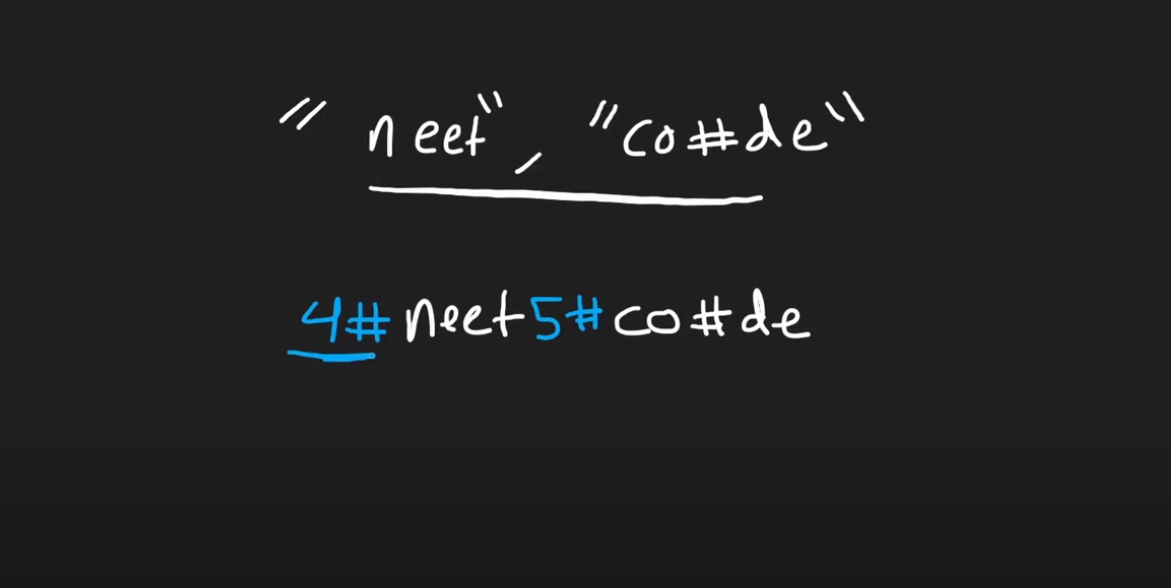

In [ ]:
##Study link: https://www.youtube.com/watch?v=B1k_sxOSgv8
def encode(strs):
    res = ''
    for s in strs:
        res += str(len(s)) + '#' + s
    # print(res)
    return res


def decode(str):
    res, i = [], 0

    while i < len(str):
        j = i
        while str[j] != '#':
            j += 1
        length = int(str[i:j])
        res.append(str[j + 1: j + 1 + length])

        i = j + 1 + length

    return res


def main():
    str1 = ["lint", "code", "love", "you"]
    str2 = ["we", "say", ":", "yes"]
    print(str1)
    print('encode :', encode(str1))
    print('decode :', decode('4#lint4#code4#love3#you'))
    print('-----------------')
    print(str2)
    print('encode :', encode(str2))
    print('decode :', decode('2#we3#say1#:3#yes'))


if __name__ == "__main__":
    main()

['lint', 'code', 'love', 'you']
encode : 4#lint4#code4#love3#you
decode : ['lint', 'code', 'love', 'you']
-----------------
['we', 'say', ':', 'yes']
encode : 2#we3#say1#:3#yes
decode : ['we', 'say', ':', 'yes']


**128. Longest Consecutive Sequence**


---


Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.

You must write an algorithm that runs in O(n) time.

 
```
Example 1:

Input: nums = [100,4,200,1,3,2]
Output: 4
Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4.
Example 2:

Input: nums = [0,3,7,2,5,8,4,6,0,1]
Output: 9
 

Constraints:

0 <= nums.length <= 105
-109 <= nums[i] <= 109
```

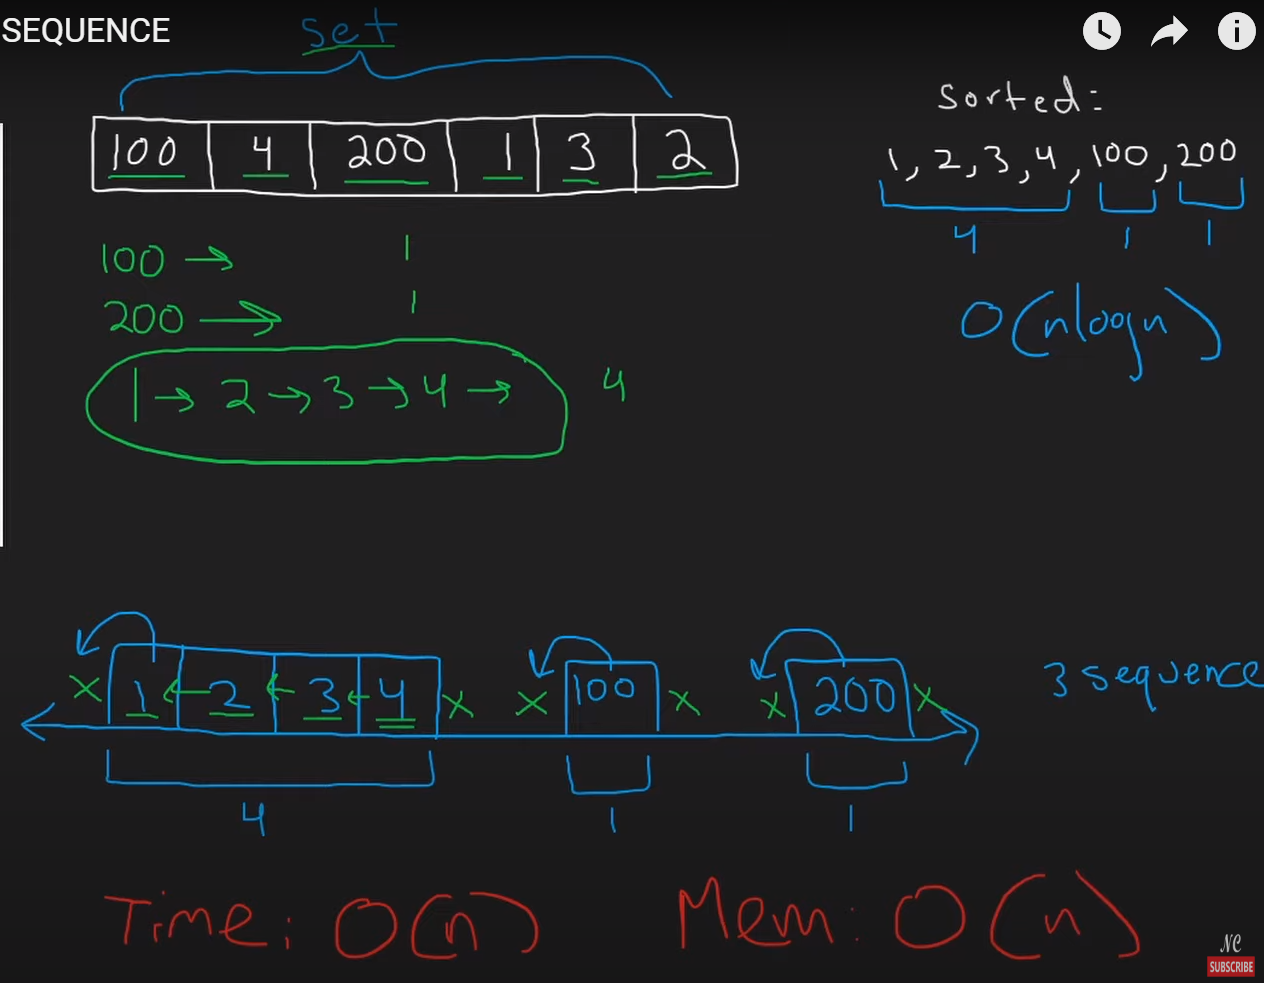

In [ ]:
## Time complexity : O(n)
## Space complexity : O(n)
## Study link: https://www.youtube.com/watch?v=P6RZZMu_maU
def longestConsecutive(nums):
    numSet = set(nums)
    longest = 0
    for n in nums:
        # check if its the start of a sequence
        if (n-1) not in numSet:
            length = 0
            while (n + length) in numSet:
                length += 1
        longest = max(length, longest)

    return longest

def main():
    print('longestConsecutive :', longestConsecutive([100,4,200,1,3,2]))
    print('-----------------')
    print('longestConsecutive :', longestConsecutive([0,3,7,2,5,8,4,6,0,1]))


if __name__ == "__main__":
    main()

longestConsecutive : 4
-----------------
longestConsecutive : 9
